# Predicting House Prices with Linear Regression

The purpose of creating this linear regression model is to predict the selling price of a house, to do this I took a dataset containing some data such as the year that was built "YearBuilt",Second flour square footage"2ndFlrSF", number of bathrooms "FullBath", etc. the goal in the end is to get as close as possible to the real data.To do this I had to import some packages which are Keras,NumPy and Pandas. Keras is an open-source neural-network library and is one of the leading high-level neural networks APIs. It is written in Python and supports multiple back-end neural network computation engines. It's fit for running over TensorFlow. NumPy is a useful array-processing package, It gives a high-performance multidimensional array object, and apparatuses for working with these arrays. Pandas is great tool that it takes information from files like a CSV, SQL database etc. and makes a Python object with rows and columns called data frame that looks fundamentally the same as table

In [209]:
from tensorflow import keras
import numpy as np # Imports the module numpy and rename the module as np.
import pandas as pd # read data from CSV file.
import matplotlib.pyplot as plt #Used to graph our results
import seaborn as sns
from scipy import stats


This function "df=pd.read_csv" is allow to import the CSV file into Python using read_csv() from pandas, In this case I imported the file "Housing_Prices.csv" and this command "df.head()" shows us the first 5 value of the dataset 

In [224]:
df=pd.read_csv("Housing_Prices.csv") # Load file .csv
df.head() # Viewing the first 5 lines

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,2003,854,1710,2,1,3,8,2008,208500
1,1976,0,1262,2,0,3,6,2007,181500
2,2001,866,1786,2,1,3,6,2008,223500
3,1915,756,1717,1,0,3,7,2006,140000
4,2000,1053,2198,2,1,4,9,2008,250000


We going to set the “X” and “Y”  values, the “X” value it’s going to be set to all of the value except for the SalesPrice to do that we gonna drop all SalePrice columns using "[X = df.drop(columns=['SalePrice'])]" and for the Y value we’ll use "Y = df[['SalePrice']]"

In [225]:
X = df.drop(columns=['SalePrice']) #esclude the colomns of SalePrice
Y = df[['SalePrice']]

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
YearBuilt       1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(9)
memory usage: 102.8 KB


In [227]:
X

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold
0,2003,854,1710,2,1,3,8,2008
1,1976,0,1262,2,0,3,6,2007
2,2001,866,1786,2,1,3,6,2008
3,1915,756,1717,1,0,3,7,2006
4,2000,1053,2198,2,1,4,9,2008
...,...,...,...,...,...,...,...,...
1455,1999,694,1647,2,1,3,7,2007
1456,1978,0,2073,2,0,3,7,2010
1457,1941,1152,2340,2,0,4,9,2010
1458,1950,0,1078,1,0,2,5,2010


In [228]:
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [229]:
print( df.keys())

Index(['YearBuilt', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'YrSold', 'SalePrice'],
      dtype='object')


I build a sequential model with the command “model = keras.Sequential()” and then I added three layers of neurous in the first layer I used 8 neurons and as activation “relu”, ReLu It is utilized to decide the output of neural network in boolean way. It maps the subsequent value between of 0 to 1 or - 1 to 1 and so on. 

In [230]:
model = keras.Sequential()

model.add(keras.layers.Dense(8, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

And I fitted the model putting the “X” and ”Y” and using epochs we going to give the command to go over the data for the time we impose, which in this case is 30. Using EarlyStopping is allow us to not get a overfitting value.

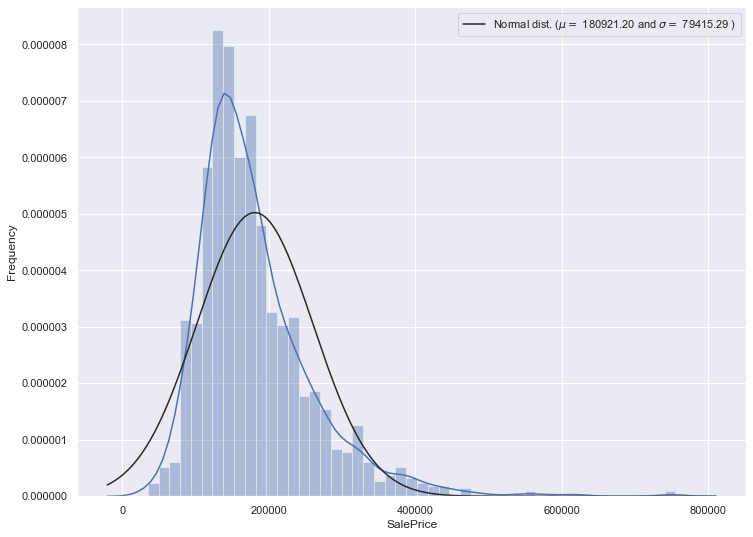

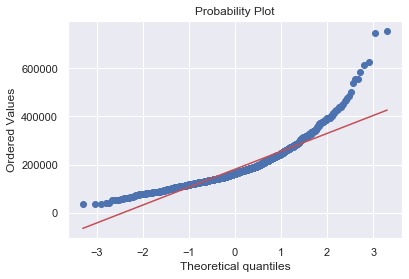

In [233]:
plt.subplots(figsize=(12,9))
sns.distplot(df['SalePrice'], fit=stats.norm)

# fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

#log function which is in numpy
df['SalePrice'] = np.log1p(df['SalePrice'])


In [236]:
#Check if the dataset has any missing-values. 
df.columns[df.isnull().any()]
# AS we can see there is not any mission value in this dataset

Index([], dtype='object')

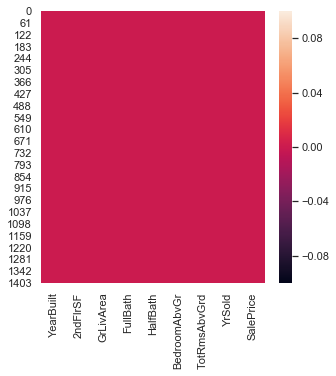

In [239]:
#plot of missing-value attributes
plt.figure(figsize=(5, 5))
sns.heatmap(df.isnull())
plt.show()

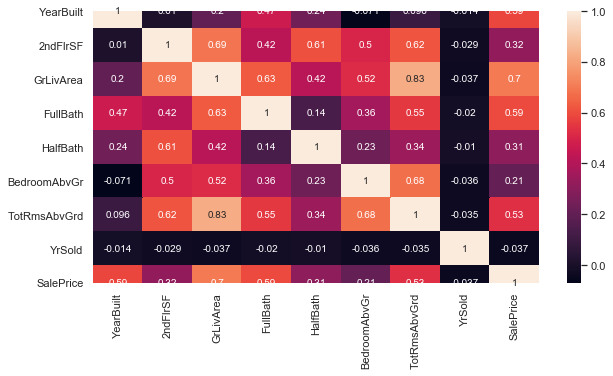

In [242]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
df_corr = df.select_dtypes(include=[np.number])
#Coralation plot
corr = df_corr.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True)


In [240]:
model.fit(X ,Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Train on 1460 samples
Epoch 1/30
1460/1460 [==============================] - 0s 54us/sample - loss: 3792848843.3973
Epoch 2/30
1460/1460 [==============================] - 0s 49us/sample - loss: 3778729328.2192
Epoch 3/30
1460/1460 [==============================] - 0s 39us/sample - loss: 3769265633.1397
Epoch 4/30
1460/1460 [==============================] - 0s 41us/sample - loss: 3755964164.9096
Epoch 5/30
1460/1460 [==============================] - 0s 40us/sample - loss: 3743363220.6904
Epoch 6/30
1460/1460 [==============================] - 0s 34us/sample - loss: 3733538069.7425
Epoch 7/30
1460/1460 [==============================] - 0s 33us/sample - loss: 3724373683.2000
Epoch 8/30
1460/1460 [==============================] - 0s 37us/sample - loss: 3712891407.4301
Epoch 9/30
1460/1460 [==============================] - 0s 41us/sample - loss: 3696919379.4630
Epoch 10/30
1460/1460 [==============================] - 0s 38us/sample - loss: 3687235806.3342
Epoch 11/30
1460/1460 [====

1460/1460 [==============================] - 0s 50us/sample - loss: 3485834669.2384
Epoch 29/30
1460/1460 [==============================] - 0s 35us/sample - loss: 3476077702.6630
Epoch 30/30
1460/1460 [==============================] - 0s 28us/sample - loss: 3460921879.4959


In the end I tested my model, from the tests it is clear that this linear regression model is able to predict and get very close to the actual values, which in this case is the sales price but this experiment can be performed with all the other data present in the file.

In [241]:
test_data = np.array([2003, 854, 1710, 2, 1, 3, 8, 2008]) 
print(model.predict(test_data.reshape(1,8), batch_size=1)) #Show the prediction

[[203265.19]]
